In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt

In [2]:
def get_stats(df, col):
    d = {
        'Медиана' : np.median,
        'Среднее': np.mean,
        'Мода' : st.mode
    }
    
    [print(f'{i} - {d[i](df[col])}', sep='\n') for i in d]

<center><h1> Step 1. Loading DataFrame </h1></center>

In [4]:
ds = fetch_california_housing()

df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.insert(8, column=ds.target_names[0], value=ds.target)

In [5]:
backup = df.copy()

<center><h1> Step 2. EDA </h1></center>

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
get_stats(df, 'MedHouseVal')

Медиана - 1.797
Среднее - 2.068558169089147
Мода - 5.00001


<center><h1> Steps 3-5. First model. Preprocessing + Model selection </h1></center>

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from sklearn.metrics import r2_score as R2

In [11]:
def model_eval(data, random_seed=0, model='linear'):
    X = data.drop(columns='MedHouseVal', axis=1)
    y = data['MedHouseVal']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    if model == 'linear':
        model = LinearRegression()
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return sqrt(MSE(y_test, y_pred)), R2(y_test, y_pred)

In [12]:
print(f'RMSE {model_eval(df)[0]}')
print(f'R2 {model_eval(df)[1]}')

RMSE 0.7170431653136085
R2 0.6006756369071422


<Axes: xlabel='MedHouseVal', ylabel='Count'>

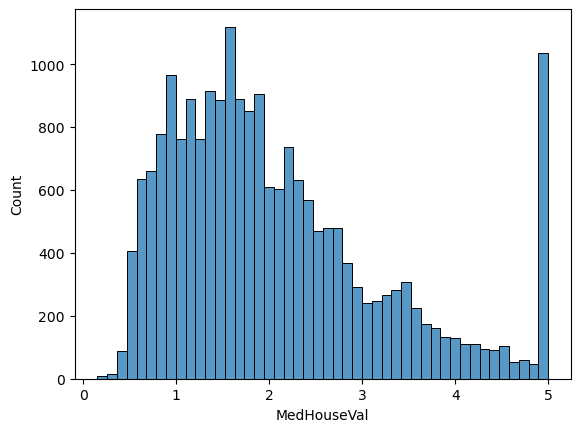

In [13]:
sns.histplot(df, x='MedHouseVal')

<center><h1> Step 6. Second model </h1></center>

<Axes: >

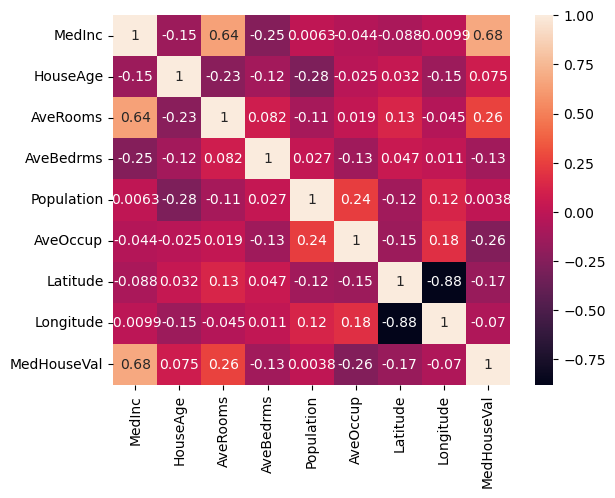

In [14]:
corr_df = df.corr(method='spearman')
sns.heatmap(corr_df, annot=True)

- Выбрали Спирмэна потому что целевая переменная хоть и похожа на нормальное распределение, но имет значительное число выбрсов.
- Чем меньше модуль коэффициента корреляции, тем меньше связей присутствует между показателями, поэтому для нашего случая оставим только те значения, где модуль коэффициента корреляции по Спирмэну > 0.1

In [15]:
df1 = df[[ind for ind, val in dict(corr_df['MedHouseVal']).items() if abs(val) >= .1]]

In [16]:
df1

,MedInc,AveRooms,AveBedrms,AveOccup,Latitude,MedHouseVal
0,8.3252,6.984127,1.023810,2.555556,37.88,4.526
1,8.3014,6.238137,0.971880,2.109842,37.86,3.585
2,7.2574,8.288136,1.073446,2.802260,37.85,3.521
3,5.6431,5.817352,1.073059,2.547945,37.85,3.413
4,3.8462,6.281853,1.081081,2.181467,37.85,3.422
...,...,...,...,...,...,...
20635,1.5603,5.045455,1.133333,2.560606,39.48,0.781
20636,2.5568,6.114035,1.315789,3.122807,39.49,0.771
20637,1.7000,5.205543,1.120092,2.325635,39.43,0.923
20638,1.8672,5.329513,1.171920,2.123209,39.43,0.847


In [17]:
print(f'RMSE {model_eval(df1)[0]}')
print(f'R2 {model_eval(df1)[1]}')

RMSE 0.8129390491837973
R2 0.5396795935463887


<center><h1> Step 7. Third model </h1></center>

In [18]:
df2 = df1.copy()
df2.describe()

,MedInc,AveRooms,AveBedrms,AveOccup,Latitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,5.429000,1.096675,3.070655,35.631861,2.068558
std,1.899822,2.474173,0.473911,10.386050,2.135952,1.153956
min,0.499900,0.846154,0.333333,0.692308,32.540000,0.149990
25%,2.563400,4.440716,1.006079,2.429741,33.930000,1.196000
50%,3.534800,5.229129,1.048780,2.818116,34.260000,1.797000
75%,4.743250,6.052381,1.099526,3.282261,37.710000,2.647250
max,15.000100,141.909091,34.066667,1243.333333,41.950000,5.000010


In [19]:
# for i in df2.columns:
#     sns.displot(df2, x=i)
#     plt.legend([i])
#     plt.show()

Предположим, что у нас в целом-то нормальные распределения с выбросами, применим правило трёх сигм и оставим 99,7 процентов выборки

In [20]:
def clean_outliers(df, y):
    for col in df.columns:
        if col != y:
            minperc = df[col].median() - (df[col].std() * 3)
            maxperc = df[col].median() + (df[col].std() * 3)

            df = df.loc[minperc < df[col]]
            df = df.loc[df[col] < maxperc]
    
    return df

In [21]:
df2 = clean_outliers(df2, 'MedHouseVal')

In [22]:
print(f'RMSE {model_eval(df2)[0]}')
print(f'R2 {model_eval(df2)[1]}')

RMSE 0.7395134128756548
R2 0.5055317590571311


Правило трёх сигм применили неадекватно, распределение было не нормальным. Выбросы можно было почистить просто ручками

<center><h1> Step 8. Forth model </h1></center>

In [23]:
df3 = df.copy()

In [24]:
df3['MedInc'] = np.sqrt(df3['MedInc'])
df3['HouseAge'] = df3['HouseAge'] ** 2
df3['Population'] = np.log(df3['Population'])

In [25]:
print(f'RMSE {model_eval(df3)[0]}')
print(f'R2 {model_eval(df3)[1]}')

RMSE 0.7412625128818342
R2 0.5878589734312407


<center><h1> Conclusion </h1></center>

1) Были выполнены три этапа работы:
- Построена модель без изменений. Вычислена метрика.
- Выделены колонки, значения в которых наиболее коррелировали с искомой переменной. Метрики значительно улучшились 
- Была сделана попытка убрать выбросы с помощью правила трёх сигм (ошибочно предполагалось, что распределение у нас нормальное). Метрики упали из-за неверной гипотезы
- были произвольно математически изменены значения в датасете. Значительно на метрики не повлияло. Метрики не изменились

In [27]:
l = {
    'model' : df,
    'model1' : df1,
    'model2' : df2,
    'model3' : df3
}

index = [i for i in l.keys()]

data = []

for key, val in l.items():
    rmse = model_eval(val)[0]
    r2 = model_eval(val)[1]
    cols = val.columns
    
    data.append([rmse, r2, [str(i) for i in cols]])

pd.DataFrame(data=data, columns=['RMSE', 'R2', 'Columns'], index=index)

,RMSE,R2,Columns
model,0.744391,0.590811,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."
model1,0.798233,0.505375,"[MedInc, AveRooms, AveBedrms, AveOccup, Latitu..."
model2,0.738105,0.515828,"[MedInc, AveRooms, AveBedrms, AveOccup, Latitu..."
model3,0.709871,0.602709,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."
